In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
from scipy.integrate import cumtrapz
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [5]:
# csvファイルの読み込み
file = "stairs"
csv_Accelerometer = f'data/{file}/Accelerometer.csv'
csv_Gyroscope = f'data/{file}/Gyroscope.csv'
csv_Pressure = f'data/{file}/Pressure.csv'
raw_Accelerometer = pd.read_csv(csv_Accelerometer)
raw_Gyroscope = pd.read_csv(csv_Gyroscope)
raw_Pressure = pd.read_csv(csv_Pressure)

print(len(raw_Accelerometer))
print(len(raw_Gyroscope))
print(len(raw_Pressure))

30351
30348
1803


<Figure size 640x480 with 0 Axes>

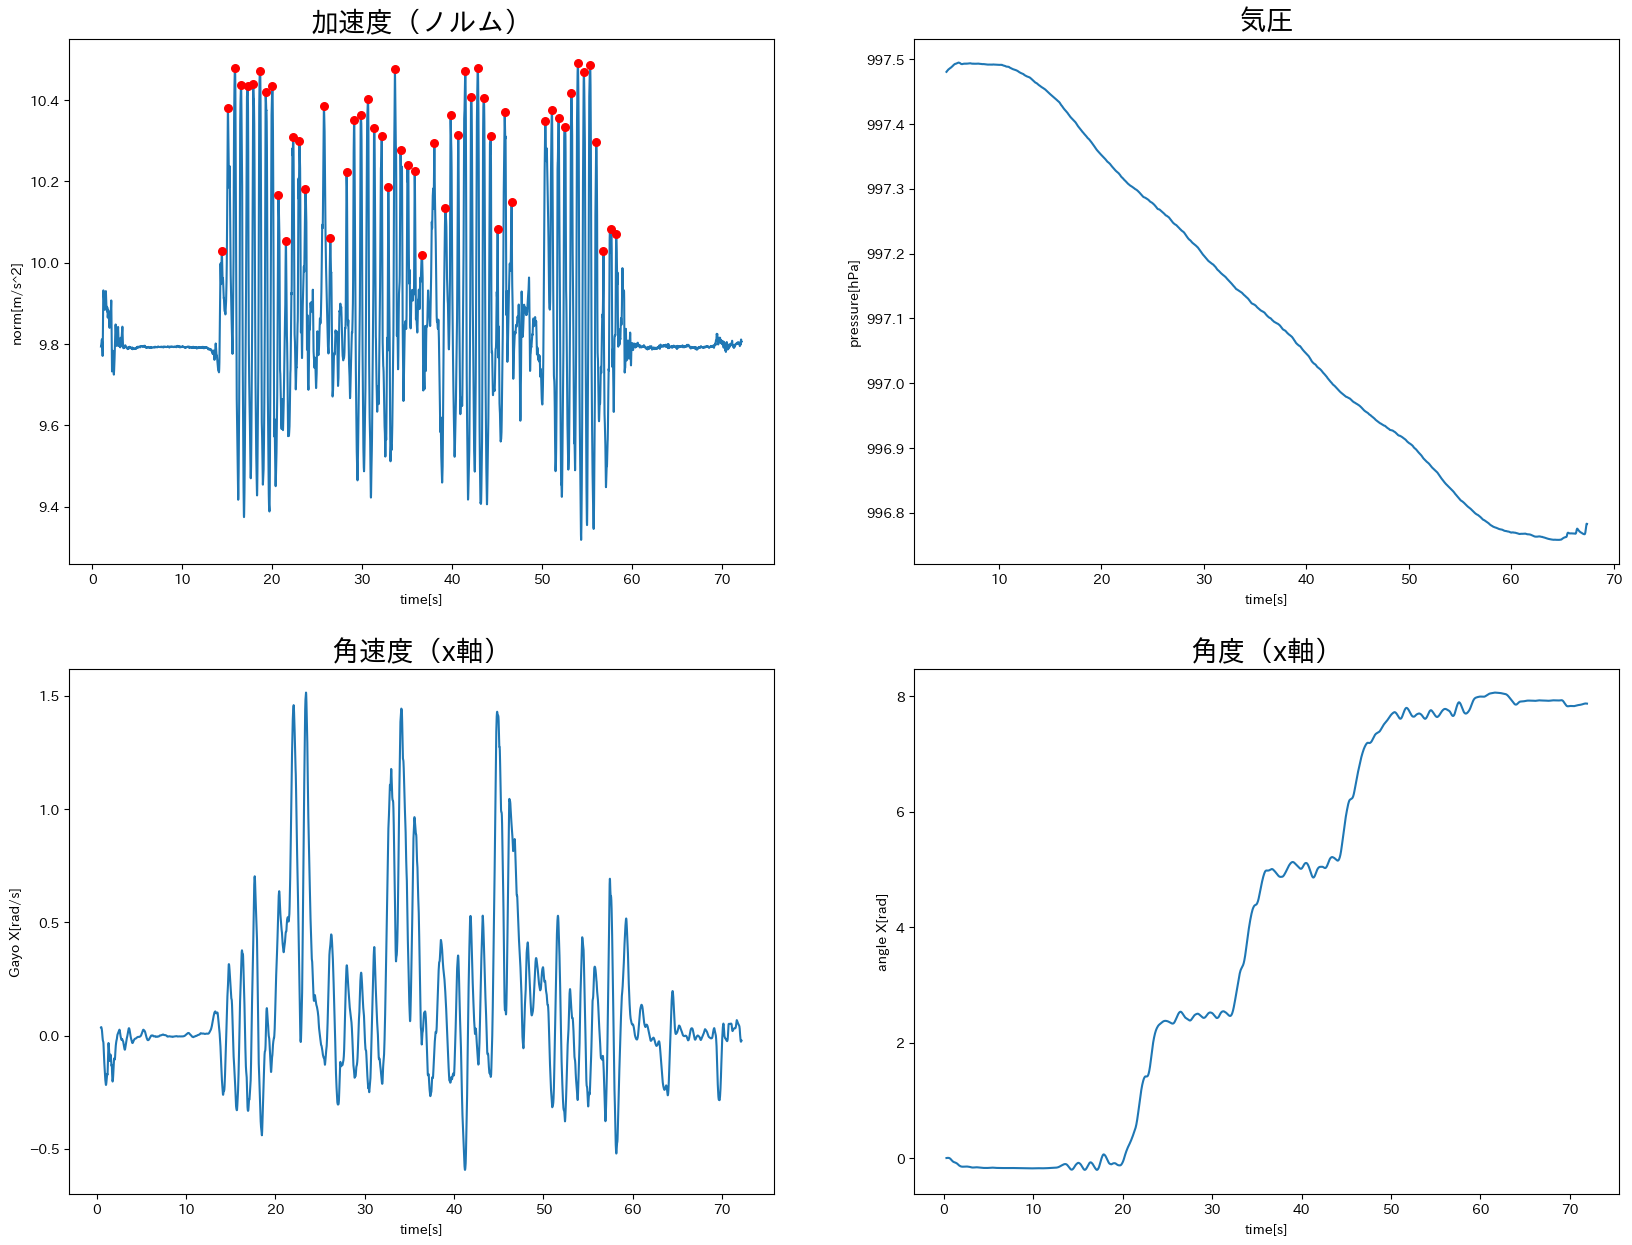

In [6]:
window_acc = 400
window_pre = 240
window_gayo = 200
shift_amount = window_pre * -1

# 生データの描画
df_acc = pd.read_csv(csv_Accelerometer)
df_pre = pd.read_csv(csv_Pressure)
df_gyro = pd.read_csv(csv_Gyroscope)

df_acc['norm'] = (df_acc['x']**2 + df_acc['y']**2 + df_acc['z']**2)**(1/2)
df_gyro['norm'] = (df_gyro['x']**2 + df_gyro['y']**2 + df_gyro['z']**2)**(1/2)

df_gyro['angle'] = np.cumsum(df_gyro['x']) / 500


df_acc['low_norm'] = df_acc['norm'].rolling(window= window_acc).mean()
df_acc['shift_low_norm'] = df_acc['low_norm'].shift(shift_amount * -1)
df_pre['low'] = df_pre['p'].rolling(window= window_pre,center=True).mean()
# df_pre['low'] = df_pre['p'].rolling(window= 30,center=True).mean()
# df_pre['shift_low'] = df_pre['low'].shift(shift_amount)
df_gyro['low_x'] = df_gyro['x'].rolling(window= window_gayo).mean()
df_gyro['angle_x'] = df_gyro['angle'].rolling(window= window_gayo,center=True).mean()

plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(df_acc["t"], df_acc["low_norm"])
ax1.set_title("加速度（ノルム）", fontsize=20)
ax1.set_xlabel("time[s]")
ax1.set_ylabel("norm[m/s^2]")
# ax1.set_xlim(20,100)
# ax1.set_xlim(20,45)

peek, _ = signal.find_peaks(df_acc['low_norm'], distance=200 ,height=10)
ax1.scatter(df_acc['t'][peek], df_acc['low_norm']
            [peek], s=30, color='red', zorder=2)

ax2 = fig.add_subplot(2,2,2)
ax2.plot(df_pre["t"], df_pre["low"])
ax2.set_title("気圧", fontsize=20)
ax2.set_xlabel("time[s]")
ax2.set_ylabel("pressure[hPa]")
# ax2.set_xlim(20,100)
# ax2.set_xlim(20,45)

ax3 = fig.add_subplot(2,2,3)
ax3.plot(df_gyro["t"], df_gyro["low_x"])
ax3.set_title("角速度（x軸）", fontsize=20)
ax3.set_xlabel("time[s]")
ax3.set_ylabel("Gayo X[rad/s]")
# ax3.set_xlim(20,100)
# ax3.set_xlim(20,45)

ax4 = fig.add_subplot(2,2,4)
ax4.plot(df_gyro["t"], df_gyro["angle_x"])
ax4.set_title("角度（x軸）", fontsize=20)
ax4.set_xlabel("time[s]")
ax4.set_ylabel("angle X[rad]")
# ax4.set_xlim(20,100)
# ax4.set_xlim(20,45)
plt.show()


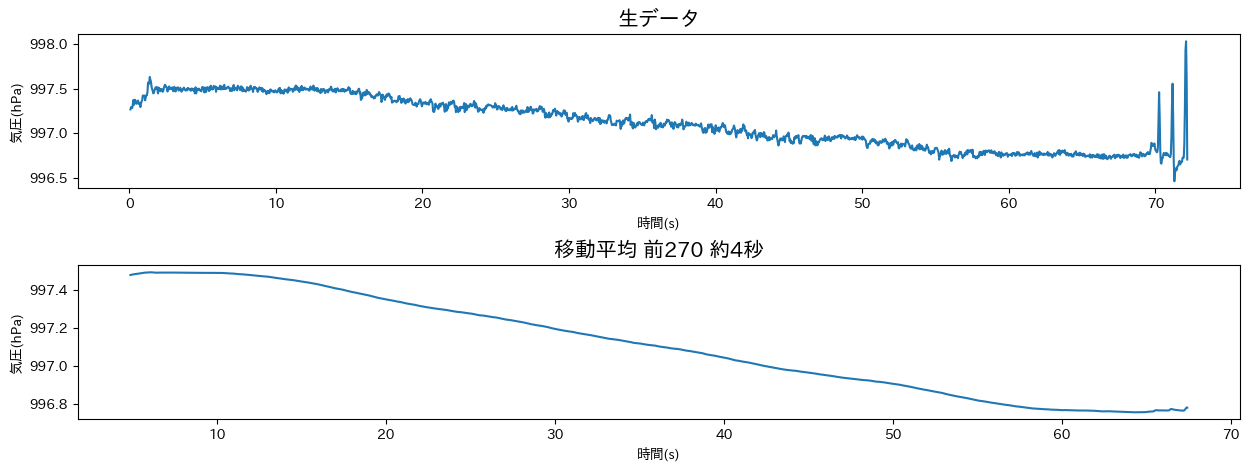

In [7]:
fig = plt.figure(figsize=(15, 5))

# fig.suptitle('気圧', fontsize=20)

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('生データ', fontsize=15)
ax1.plot(df_pre['t'], df_pre['p'])
ax1.set_xlabel('時間(s)')
ax1.set_ylabel('気圧(hPa)')

plt.subplots_adjust(hspace=0.5)

ax2 = plt.subplot(2, 1, 2)
ax2.set_title('移動平均 前270 約4秒', fontsize=15)
ax2.plot(df_pre['t'], df_pre['low'])
ax2.set_xlabel('時間(s)')
ax2.set_ylabel('気圧(hPa)')
plt.show()

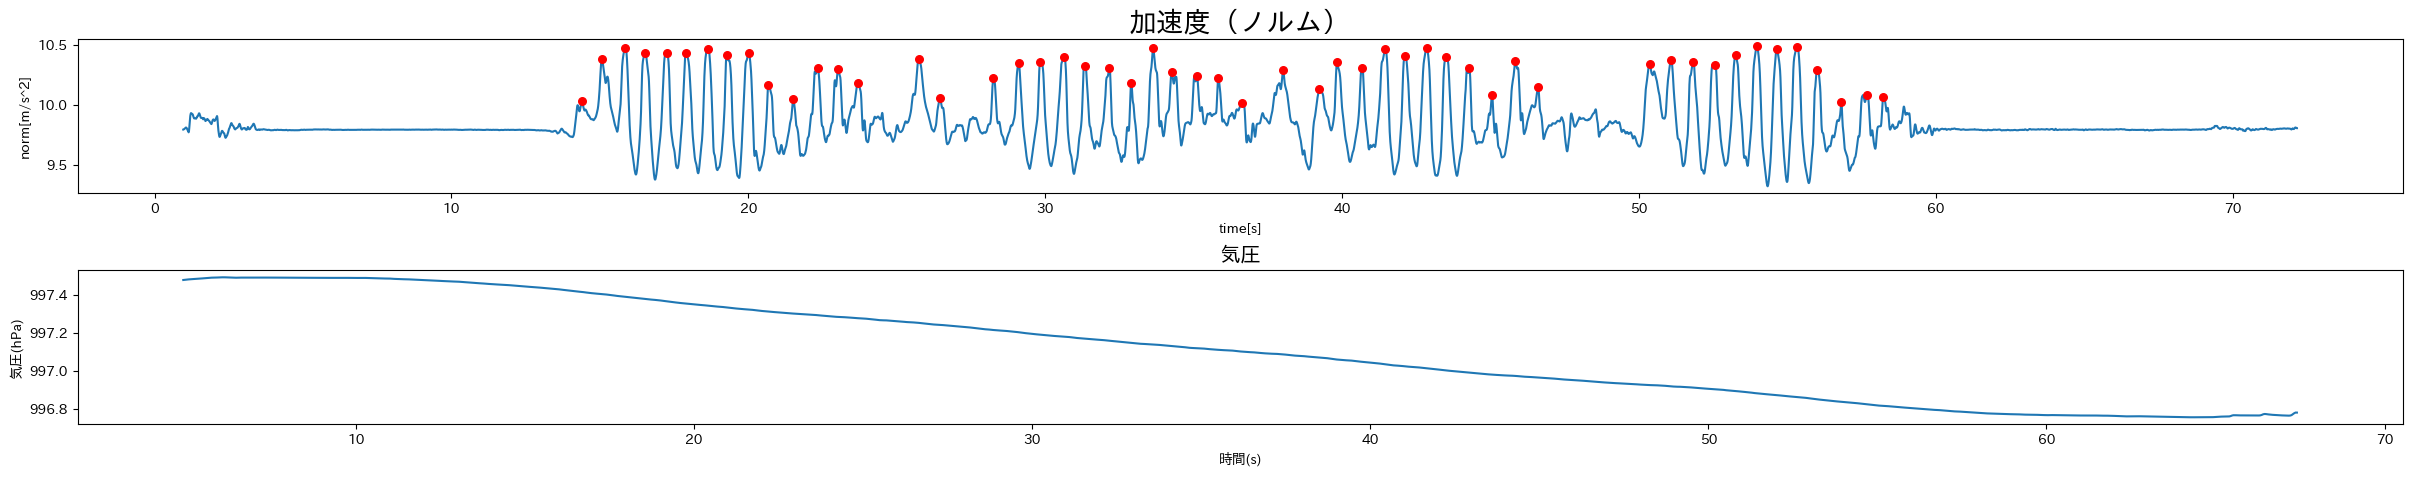

In [8]:
fig = plt.figure(figsize=(30, 5))
fig = plt.subplots_adjust(hspace=0.5)

ax1 = plt.subplot(2, 1, 1)
ax1.plot(df_acc["t"], df_acc["low_norm"])
ax1.set_title("加速度（ノルム）", fontsize=20)
ax1.set_xlabel("time[s]")
ax1.set_ylabel("norm[m/s^2]")


peek, _ = signal.find_peaks(df_acc['low_norm'], distance=200 ,height=10)
ax1.scatter(df_acc['t'][peek], df_acc['low_norm']
            [peek], s=30, color='red', zorder=2)

# df_pre['low_shift'] = df_pre['low'].shift(-330)

ax2 = plt.subplot(2, 1, 2)
ax2.set_title('気圧', fontsize=15)
ax2.plot(df_pre['t'], df_pre['low'])
ax2.set_xlabel('時間(s)')
ax2.set_ylabel('気圧(hPa)')

plt.show()

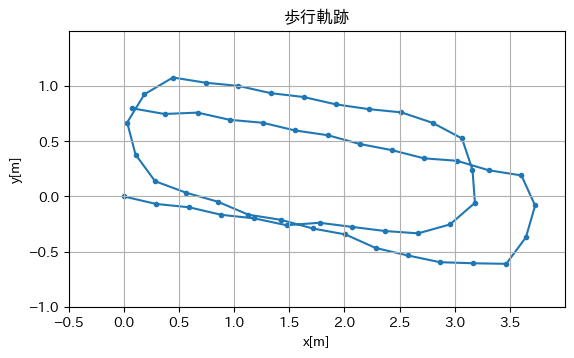

In [24]:
# 軌跡を描く
step = 0.3
point = [[0, 0]]
for p in peek:
    x = step * np.cos(df_gyro['angle_x'][p]*1.2) + point[-1][0]
    y = step * np.sin(df_gyro['angle_x'][p]*1.2) + point[-1][1]

    point.append([x, y])

point = pd.DataFrame(data=point, columns=['x', 'y'])

point['x'] = point['x'] - point['x'][0]
point['y'] = point['y'] - point['y'][0]


# size = ((-1, 3.5), (-1, 2))
size = ((-0.5, 4), (-1, 1.5))

plt.plot(point['x'], point['y'], '.-', label='推定', zorder=1)
# plt.plot(point['x'], point['y'],  label='推定', zorder=1)


# 軸を揃える
plt.gca().set_aspect('equal', adjustable='box')

# plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.title('歩行軌跡')
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.xticks(np.arange(size[0][0], size[0][1], 0.5))
plt.yticks(np.arange(size[1][0], size[1][1], 0.5))
plt.xlim(size[0][0], size[0][1])
plt.ylim(size[1][0], size[1][1])

plt.grid()
plt.show()

# plt.figure()
# plt.plot(point['x'], point['y'], '.-', label='推定', zorder=1, marker='o')

# # X軸とY軸の範囲を揃える

# #軸を揃える
# plt.xlabel('X 方向 (cm)')
# plt.ylabel('Y 方向 (cm)')
# plt.title('歩行推定')



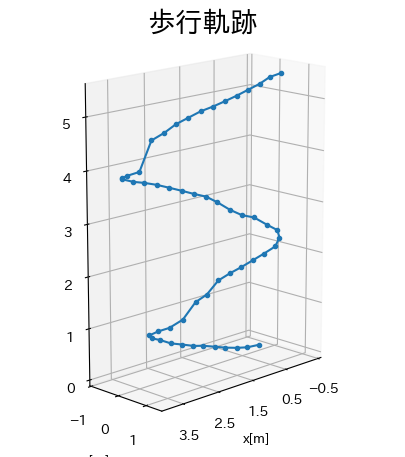

In [25]:
# 軌跡を描く
point = [[0, 0, 0]]
ps=[]
for p in peek:
    x = step * np.cos(df_gyro['angle_x'][p]*1.2) + point[-1][0]
    y = step * np.sin(df_gyro['angle_x'][p]*1.2) + point[-1][1]
    z = df_pre['low'][int(p * 0.0487804878)]
    z = df_pre['low'].max() if np.isnan(z) else z

    point.append([x, y, z])

point = pd.DataFrame(data=point, columns=['x', 'y', 'z'])

point['z'] = (point['z'] - point['z'][1]) * -10
point['z'][0] = point['z'][1]


# グラフを描画する
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')

ax.plot(point['x'], point['y'], point['z'], '.-', zorder=1)

plt.gca().set_aspect('equal', adjustable='box')
plt.title('歩行軌跡', fontsize=20)
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.ylabel('z[m]')
plt.xticks(np.arange(size[0][0], size[0][1], 1))
plt.yticks(np.arange(size[1][0], size[1][1], 1))
plt.xlim(size[0][0], size[0][1])
plt.ylim(size[1][0], size[1][1])

# 視野の調整
ax.view_init(azim=45,elev=15)

plt.show()


In [29]:
# 軌跡を描く
point = [[0, 0, 0]]
ps=[]

for p in peek:
    z = df_pre['low'][int(p * 0.0487804878)]
    z = df_pre['low'].max() if np.isnan(z) else z

    point.append([z, p])

point = pd.DataFrame(data=point, columns=['z', 'p'])

point['z'] = (point['z'] - point['z'][1]) * -10
point['z'][0] = point['z'][1]

# グラフを描画する
plt.figure(figsize=(10, 5))

plt.plot(point['z'], point['p'])

plt.gca().set_aspect('equal', adjustable='box')

plt.show()


ValueError: 2 columns passed, passed data had 3 columns

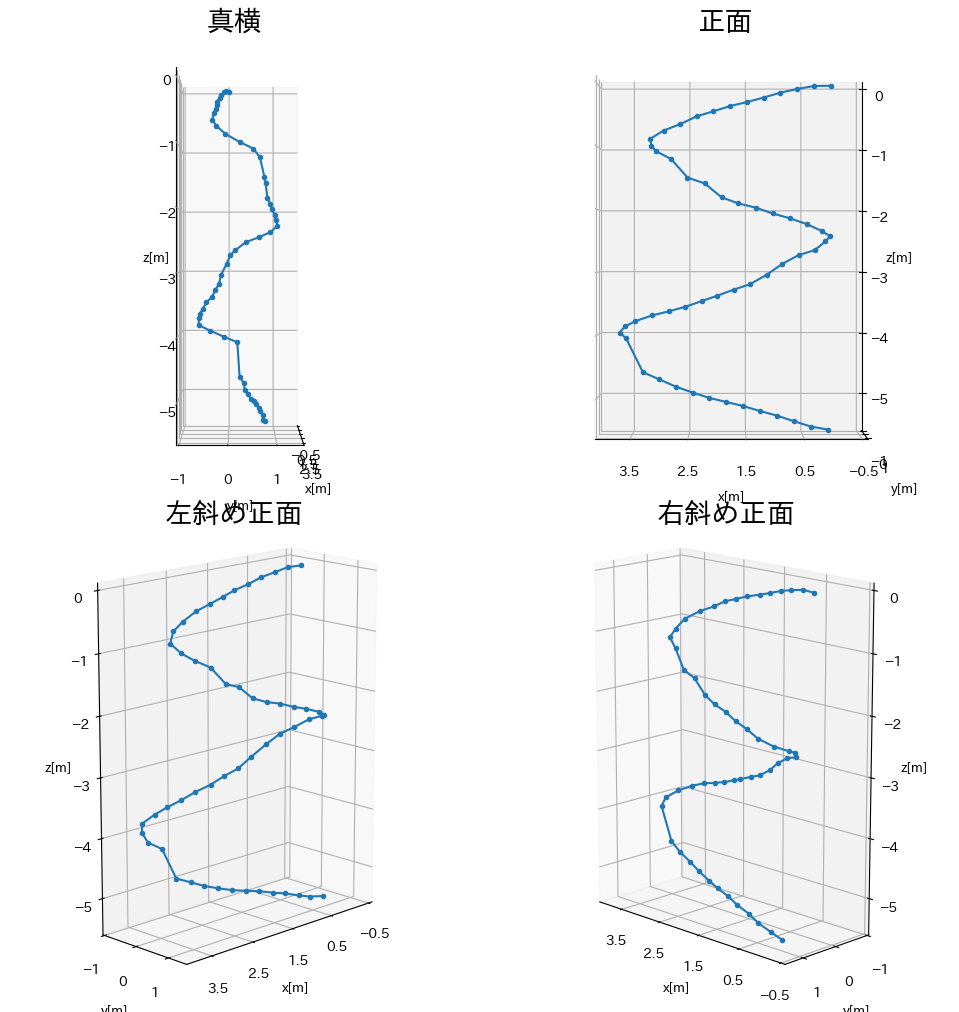

In [27]:
# 軌跡を描く
point = [[0, 0, 0]]
for p in peek:
    x = step * np.cos(df_gyro['angle_x'][p]*1.2) + point[-1][0]
    y = step * np.sin(df_gyro['angle_x'][p]*1.2) + point[-1][1]
    z = df_pre['low'][int(p * 0.0487804878)]

    point.append([x, y, z])

point = pd.DataFrame(data=point, columns=['x', 'y', 'z'])

point['z'] = (point['z'] - point['z'][1]) * 10
point['z'][0] = point['z'][1]

fig = plt.figure(figsize=(10, 10))

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.plot(point['x'], point['y'], point['z'], '.-', zorder=1)

    ax.set_aspect('equal', adjustable='box')

    if i == 1:
        i = 2
    elif i == 2:
        i = 1

    if i == 0:
        ax.set_title('真横', fontsize=20)
    elif i == 1:
        ax.set_title('左斜め正面', fontsize=20)
    elif i == 2:
        ax.set_title('正面', fontsize=20)
    elif i == 3:
        ax.set_title('右斜め正面', fontsize=20)
    ax.set_xlabel('x[m]')
    ax.set_ylabel('y[m]')
    ax.set_zlabel('z[m]')
    ax.set_xticks(np.arange(size[0][0], size[0][1], 1))
    ax.set_yticks(np.arange(size[1][0], size[1][1], 1))
    ax.set_xlim(size[0][0], size[0][1])
    ax.set_ylim(size[1][0], size[1][1])
    # ax.set_scatter(point['x'], point['y'], point['z'], c='r', zorder=2)
    # ax.set_label('time [sec]')
    # ax.scatter(point['x'], point['y'], point['z'], c='r', zorder=2)
    # cbar = fig.colorbar(ax.plot([], [], [], c='r', label='time [sec]')[0])


    # 視野の調整
    if i ==  0 or i == 2:
        ax.view_init(azim=0 + i * 45, elev=0)
    else:
        ax.view_init(azim=0 + i * 45, elev=15)


plt.tight_layout()
plt.show()
